# **SEATTLE DATA GUY YOUTUBE ANALYSIS**

In the following notebook we will be doing an analysis of seattle data guy youtube channel  and try to get insights and trends in this youtube channel.

Summaries of insights will be in provided after each code block .

Also a presentation on findings will be provided consequent to this.

The data will also be enclosed in this project and it will be a csv file which we have accessed it from youtube using the youtube api as at 10th october 2024

In [2]:
# we will be importing python libraries that we will be using in the entirety of our project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# we will be reading the data from that will be also accessible for further analysis if you may wish to continue further analysis on this channel
df =pd.read_csv('/content/seattle_data.csv')

In [5]:
# These are the top videos in our dataset means that these are the latest videos to be published on this channel
df.head()

,Title,Published_date,Views,Likes,Dislikes,Comments,Duration (Minutes)
0,Extracting Data From APIs As Data Engineers - ...,2024-10-04T14:15:31Z,4737,182,0,16,15.47
1,Setting Up Data teams - In The Age Of AI With ...,2024-10-03T04:11:45Z,762,20,0,0,58.38
2,From Hackathons to Co-Founding - Analyzing Uns...,2024-10-01T05:05:10Z,706,24,0,0,57.30
3,Finding The Right Data Projects To Work On And...,2024-09-26T04:40:27Z,1478,55,0,1,60.42
4,Understanding SQL Query Execution - What Happe...,2024-09-20T16:50:51Z,4510,226,0,15,8.53


In [6]:
# we will be checking whether we have nulls in our data
df.isnull().sum()

,0
Title,0
Published_date,0
Views,0
Likes,0
Dislikes,0
Comments,0
Duration (Minutes),0


In [7]:
# we will be checking for data types for our columns in our data
df.dtypes

,0
Title,object
Published_date,object
Views,int64
Likes,int64
Dislikes,int64
Comments,int64
Duration (Minutes),float64


We have seen the date column is an object which should not be the case and we will need to change this for better analysis

In [8]:

df.describe()

,Views,Likes,Dislikes,Comments,Duration (Minutes)
count,273.000000,273.000000,273.0,273.000000,273.000000
mean,19558.736264,517.051282,0.0,35.135531,27.797143
std,34936.625449,1004.876085,0.0,43.794808,40.596672
min,0.000000,0.000000,0.0,0.000000,0.000000
25%,3559.000000,106.000000,0.0,6.000000,10.330000
50%,8064.000000,225.000000,0.0,21.000000,13.670000
75%,19151.000000,492.000000,0.0,45.000000,48.880000
max,331197.000000,12643.000000,0.0,360.000000,560.970000


In [9]:
# we want to see if we have any duplicates in our data
df['Title'].nunique()

273

In [10]:
# in the following code we will be converting  the date column  to datetime column
df['Published_date'] = pd.to_datetime(df['Published_date'])


print(df.dtypes)

Title                              object
Published_date        datetime64[ns, UTC]
Views                               int64
Likes                               int64
Dislikes                            int64
Comments                            int64
Duration (Minutes)                float64
dtype: object


In [11]:
# In the following we will be looking at the dislikes in our data and when we find out there are dsilikes
#we will want to know whcih videos are most disliked and we will look at the attributes of all of them
total_dislikes = df['Dislikes'].sum()
print(f'Total Number of Dislikes: {total_dislikes}')

Total Number of Dislikes: 0


In [12]:
# We see that we have no dislikes in our videos  not even one and thus we dont need the column dislikes since no analysis can be done on that column
df.drop(columns=['Dislikes'], inplace=True)


In [13]:
# we will also be looking at other statistics such as the mean of views,likes and comments
avg_views = df['Views'].mean()
avg_likes = df['Likes'].mean()
avg_comments = df['Comments'].mean()

print(f'Average Views: {avg_views}')
print(f'Average Likes: {avg_likes}')
print(f'Average Comments: {avg_comments}')

Average Views: 19558.736263736264
Average Likes: 517.0512820512821
Average Comments: 35.13553113553114


In [14]:

numeric_df = df.select_dtypes(include=['number'])
# Calculate the correlation
correlation_matrix = numeric_df.corr()

# Print the correlation matrix
print("Correlation Matrix of Video Metrics:")
print(correlation_matrix)


Correlation Matrix of Video Metrics:
                       Views     Likes  Comments  Duration (Minutes)
Views               1.000000  0.897698  0.739385           -0.153404
Likes               0.897698  1.000000  0.796955           -0.132612
Comments            0.739385  0.796955  1.000000           -0.229340
Duration (Minutes) -0.153404 -0.132612 -0.229340            1.000000


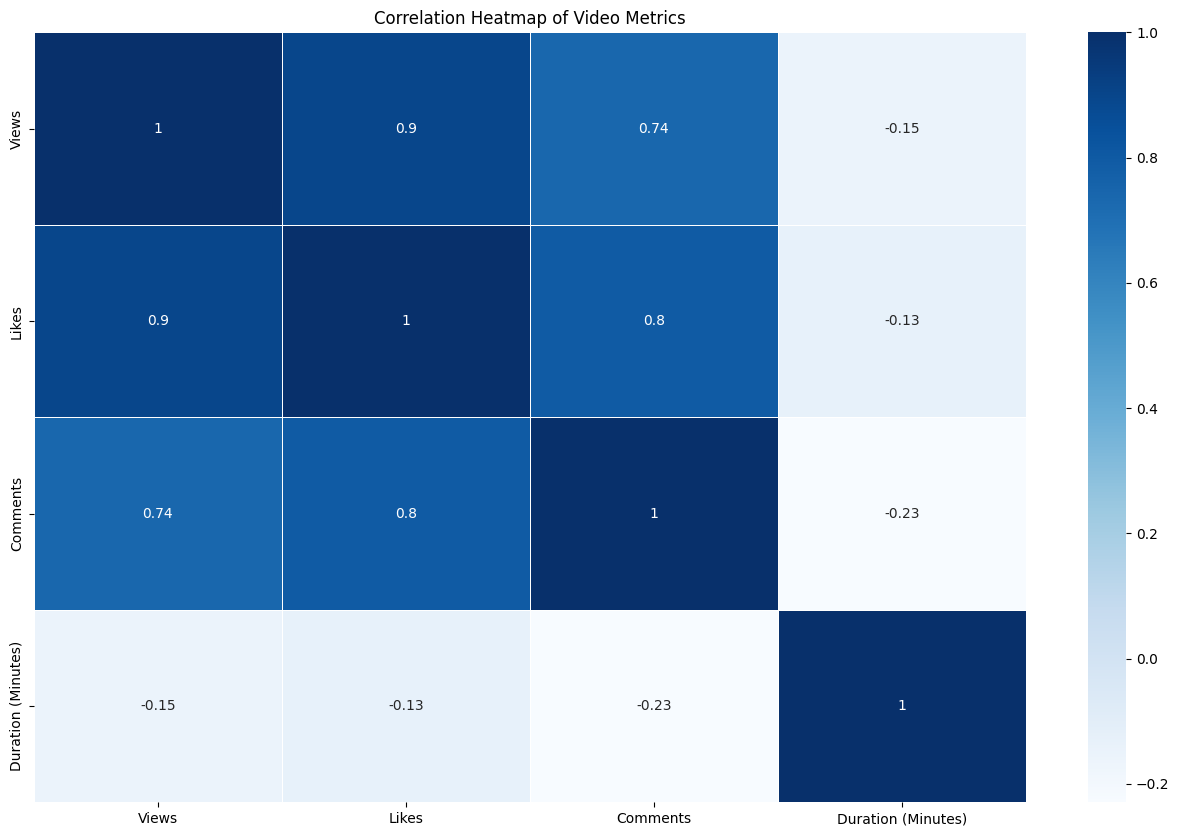

In [15]:
numeric_df = df.select_dtypes(include=['number'])

# Draw a heatmap for correlation
plt.figure(figsize=(16, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='Blues', linewidths=0.5, linecolor='white')
plt.title('Correlation Heatmap of Video Metrics')
plt.show()



- **1** means a perfect positive correlation: when one variable increases, the other one also increases.
- **-1** means a perfect negative correlation: when one variable increases, the other one decreases.
- **0** means no correlation: there’s no relationship between the two variables.

### Interpretation of the Correlation Matrix

1. **Views and Likes (0.90)**:
   - There’s a very strong positive correlation between views and likes. This means that as the number of views on a video increases, the number of likes it receives also tends to increase. Essentially, videos with more viewers generally get more likes.

2. **Views and Comments (0.74)**:
   - There’s a strong positive correlation between views and comments. This indicates that videos with more views also tend to have more comments. So, when many people watch a video, they are likely to comment on it as well.

3. **Likes and Comments (0.80)**:
   - There’s a strong positive correlation between likes and comments. This suggests that videos that receive many likes also tend to get many comments. If viewers enjoy a video enough to like it, they are also more likely to share their thoughts in the comments.

4. **Duration (Minutes) and Other Metrics**:
   - The correlation values between the duration of the videos and the other metrics (views, likes, and comments) are all negative:
     - **Views (-0.15)**: A slight negative correlation suggests that longer videos might get slightly fewer views.
     - **Likes (-0.13)**: A slight negative correlation means that longer videos may receive slightly fewer likes.
     - **Comments (-0.23)**: A stronger negative correlation indicates that longer videos may get fewer comments compared to shorter ones.

### Overall Summary
- In summary, shorter videos might perform better in terms of getting views, likes, and comments, while the relationship between views, likes, and comments is quite strong, suggesting that if a video is popular (lots of views), it will likely receive many likes and comments as well.

<Axes: title={'center': 'Distribution of Video Durations'}, ylabel='Frequency'>

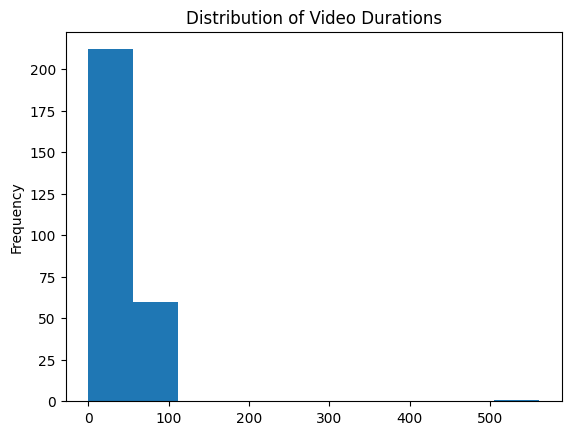

In [24]:
df['Duration (Minutes)'].plot(kind='hist', title='Distribution of Video Durations')


<Axes: title={'center': 'Views Trend Over Time'}, xlabel='Published_date'>

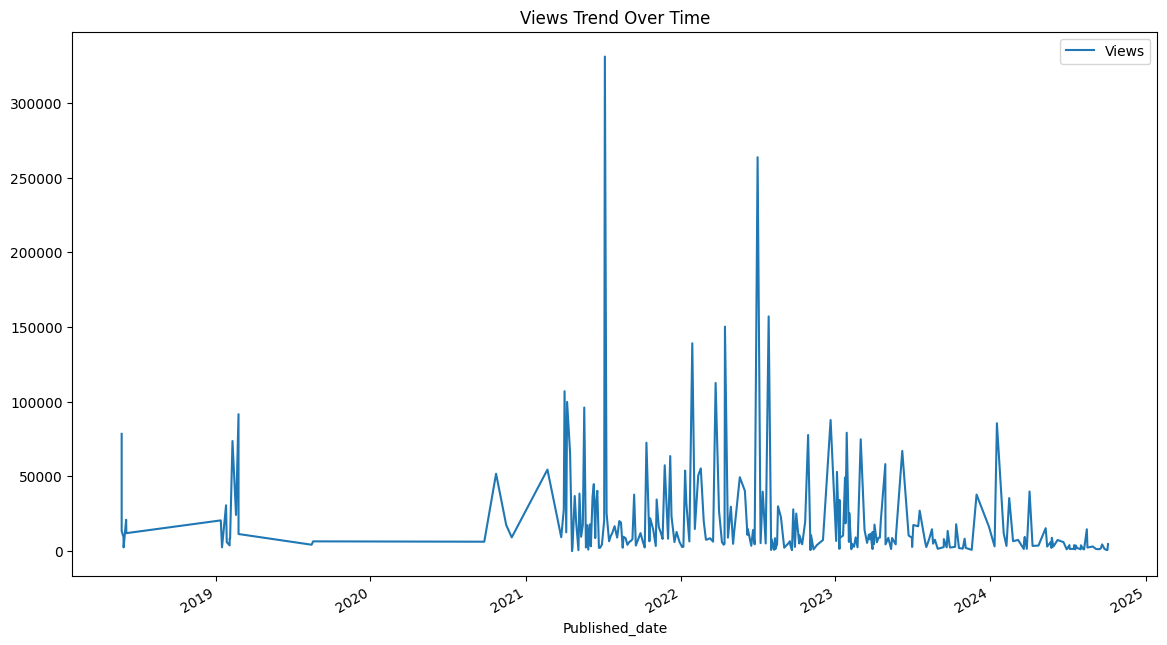

In [25]:
#In the following trend we will be looking at the trend of views overtime and perfomance
df['Published_date'] = pd.to_datetime(df['Published_date'])
df.plot(x='Published_date', y='Views', kind='line', title='Views Trend Over Time', figsize=(14, 8))


In the above plot we can see the trend at the beggining was a slow one and flat but on 2021 the views increased and remained steady for two years and after that the trend has been decreasing

In [27]:
# in the folwoing block we will be looking at the totalnumber of views per year we have seen the trend above that its reducing
# Extract the year from the Published_date column
df['Year'] = df['Published_date'].dt.year

# Group by 'Year' and calculate the total number of views
views_per_year = df.groupby('Year')['Views'].sum()

# Print the total number of views per year
print("Total number of views per year:")
print(views_per_year)



Total number of views per year:
Year
2018     136775
2019     298720
2020      84791
2021    1762145
2022    1769687
2023     949224
2024     338193
Name: Views, dtype: int64


In [28]:
# in the follwong we will be looking at the cause of this trend
# Group by 'Year' and count the number of videos
videos_per_year = df.groupby('Year').size()

# Print the total number of videos per year
print("Total number of videos per year:")
print(videos_per_year)


Total number of videos per year:
Year
2018     6
2019    14
2020     4
2021    68
2022    67
2023    68
2024    46
dtype: int64


we can see that the number of videos produced has remained quite steady so the viewership reducing its not a mattter of videos published reducing but other factors

In [29]:

# we will look at the average viewrship per video

# Group by 'Year' to calculate the total number of videos and total views
summary_per_year = df.groupby('Year').agg(
    total_videos=('Views', 'size'),
    total_views=('Views', 'sum')
)

# Calculate the average views per video
summary_per_year['average_views_per_video'] = summary_per_year['total_views'] / summary_per_year['total_videos']

# Print the summary with total videos and average views per video
print("Total videos and average views per video by year:")
print(summary_per_year[['total_videos', 'average_views_per_video']])

Total videos and average views per video by year:
      total_videos  average_views_per_video
Year                                       
2018             6             22795.833333
2019            14             21337.142857
2020             4             21197.750000
2021            68             25913.897059
2022            67             26413.238806
2023            68             13959.176471
2024            46              7352.021739


The average viewership has a sloping dowanward trend over the years .


In 2021 and 2023 has the same number of videos produced yet the viewership reduced by half  so we can comfortably say that as years go by in this  youtube channel  the number of videos really does not have an influence on the views

In [50]:

# lets look whether the duration of videos has an impact on the viewership


# Group by 'Year' to calculate the total number of videos and the average duration
summary_per_year = df.groupby('Year').agg(
    total_videos=('Duration (Minutes)', 'size'),
    average_duration=('Duration (Minutes)', 'mean')
).reset_index()

# Print the summary with total videos and average duration per video
print("Total videos and average duration per video by year:")
print(summary_per_year[['Year', 'total_videos', 'average_duration']])


Total videos and average duration per video by year:
   Year  total_videos  average_duration
0  2018             6          9.058333
1  2019            14         10.557857
2  2020             4         15.427500
3  2021            68         13.991618
4  2022            67         27.639701
5  2023            68         40.812059
6  2024            46         37.961739


we can clearly see that gradually the duration of videos has increased and when we take the two years 2021 and 2023 we have same number of videos with very different viewership also we see that the average duration has almost trippled .

so yes we can derive insights from this and day that as the dutration of videos increase the viewership of videos reduce.

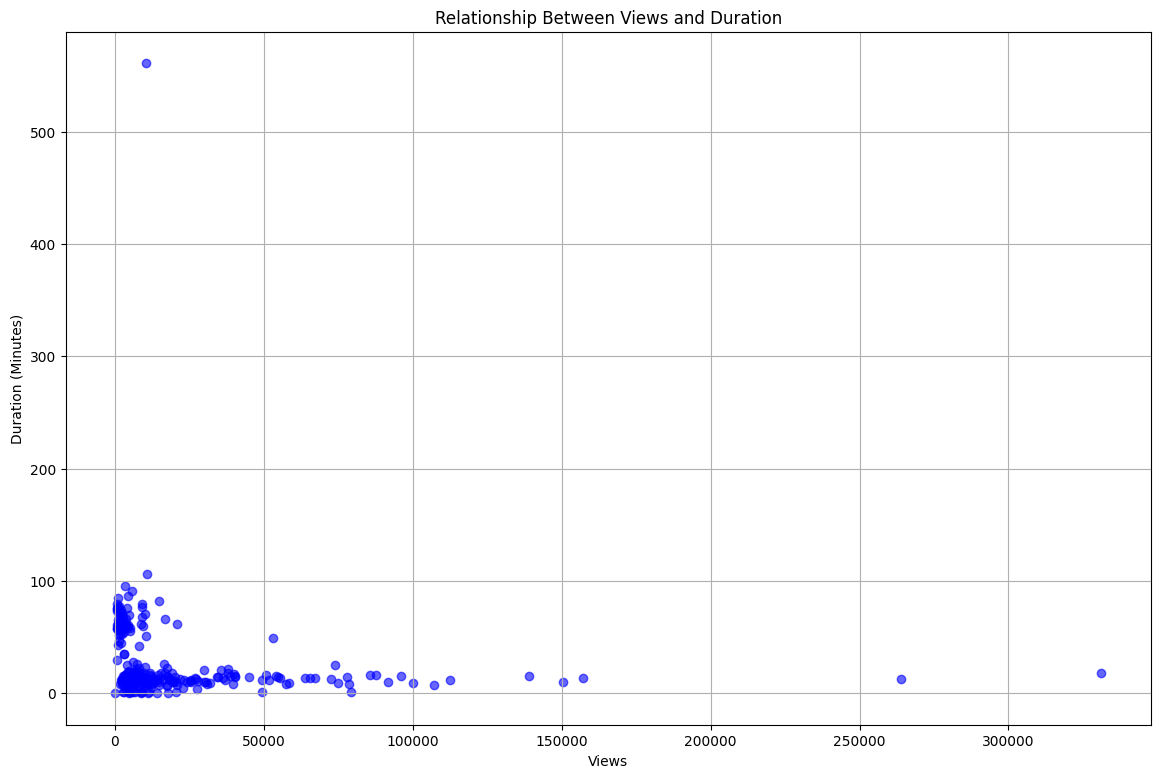

In [30]:

# Plotting the relationship between Views and Duration
plt.figure(figsize=(14, 9))
plt.scatter(df['Views'], df['Duration (Minutes)'], color='blue', alpha=0.6)
plt.title('Relationship Between Views and Duration')
plt.xlabel('Views')
plt.ylabel('Duration (Minutes)')
plt.grid()
plt.show()


As we can see  a shorter video has more views and as the duration increases the viewership reduces

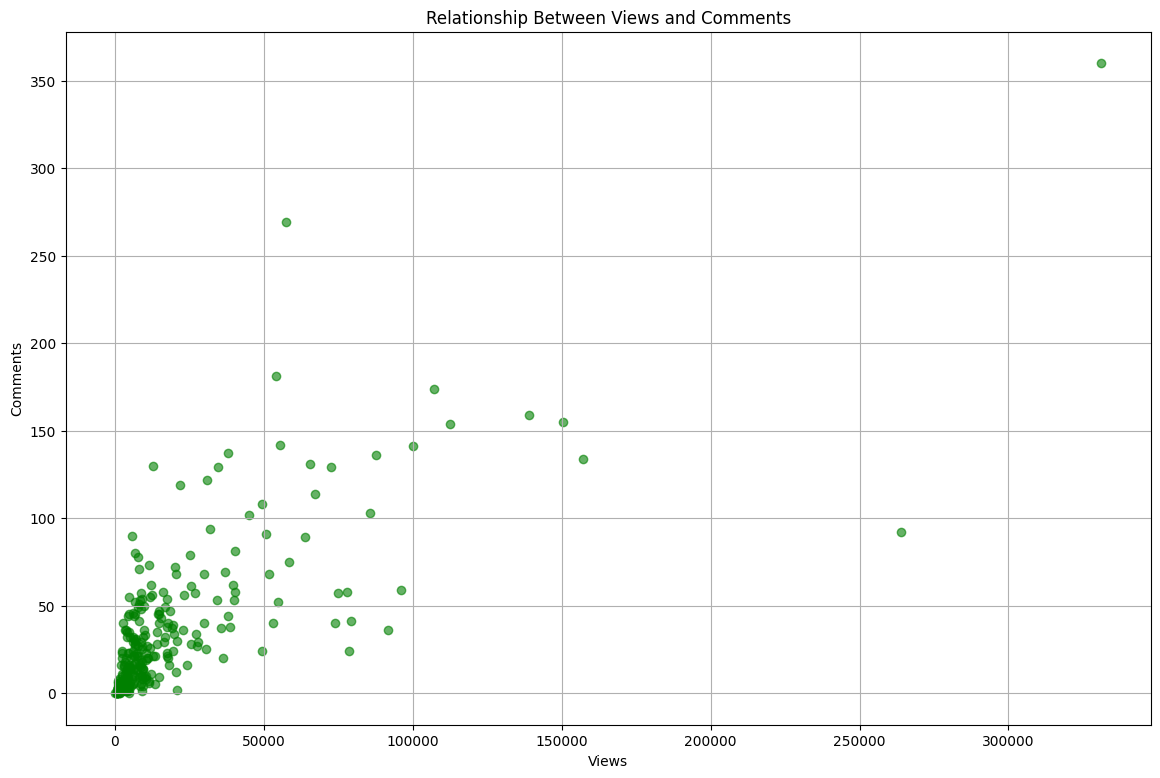

In [31]:

# Plotting the relationship between Views and Comments
plt.figure(figsize=(14, 9))
plt.scatter(df['Views'], df['Comments'], color='green', alpha=0.6)
plt.title('Relationship Between Views and Comments')
plt.xlabel('Views')
plt.ylabel('Comments')
plt.grid()
plt.show()


We can see the  views and comments have  postive correlation such that as the views increae so does the comments

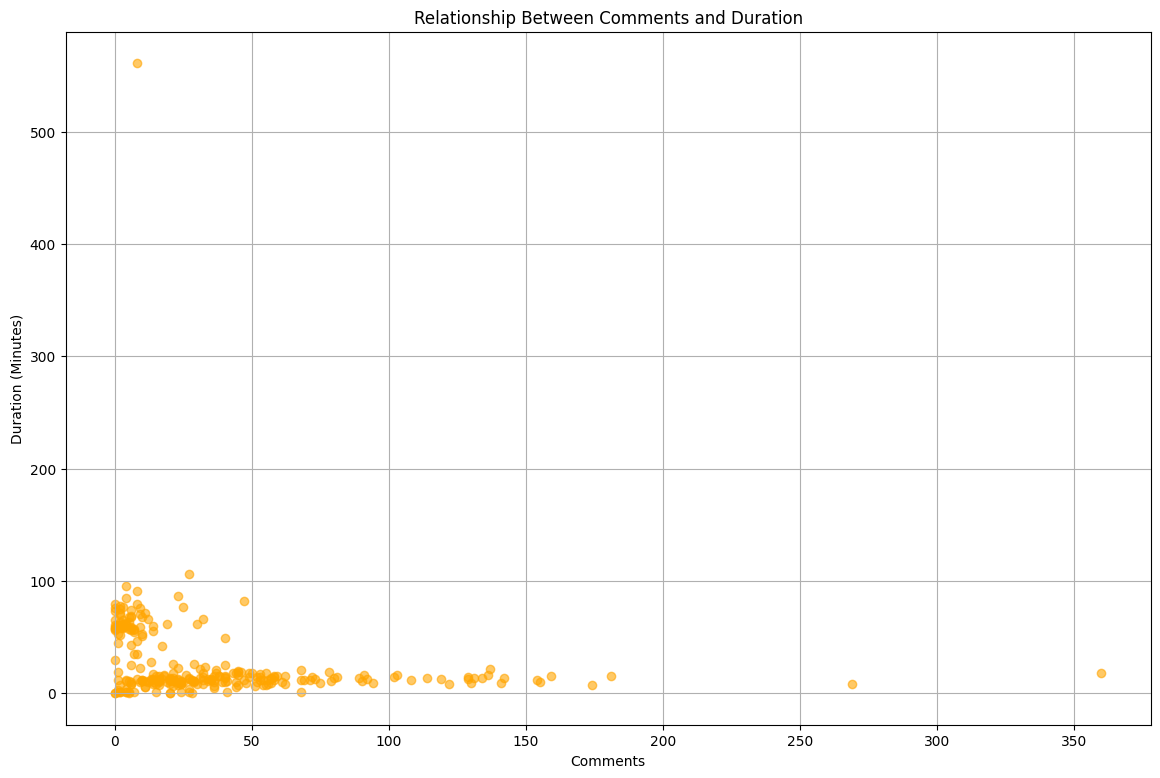

In [32]:

# Plotting the relationship between Comments and Duration
plt.figure(figsize=(14, 9))
plt.scatter(df['Comments'], df['Duration (Minutes)'], color='orange', alpha=0.6)
plt.title('Relationship Between Comments and Duration')
plt.xlabel('Comments')
plt.ylabel('Duration (Minutes)')
plt.grid()
plt.show()


a shorter video tends to have more comments

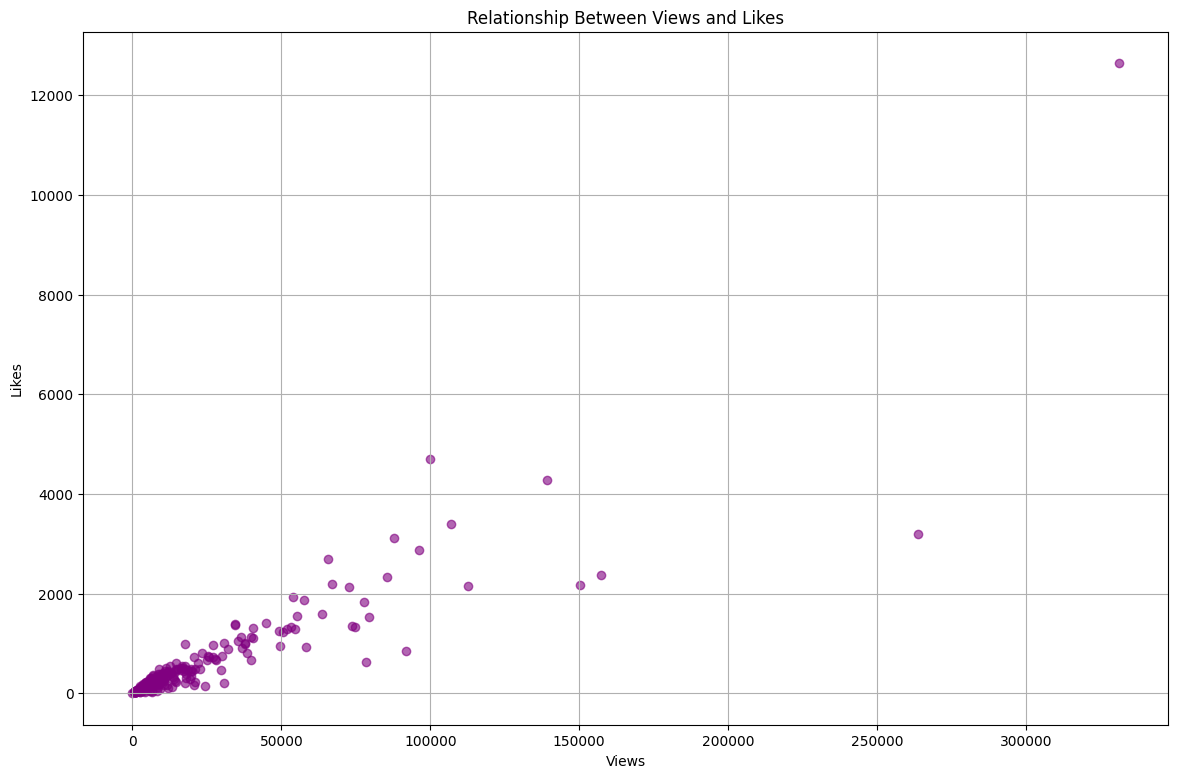

In [33]:
# Plotting the relationship between Views and Likes
plt.figure(figsize=(14, 9))
plt.scatter(df['Views'], df['Likes'], color='purple', alpha=0.6)
plt.title('Relationship Between Views and Likes')
plt.xlabel('Views')
plt.ylabel('Likes')
plt.grid()
plt.show()

We can see we have a positive correlation between views and likes

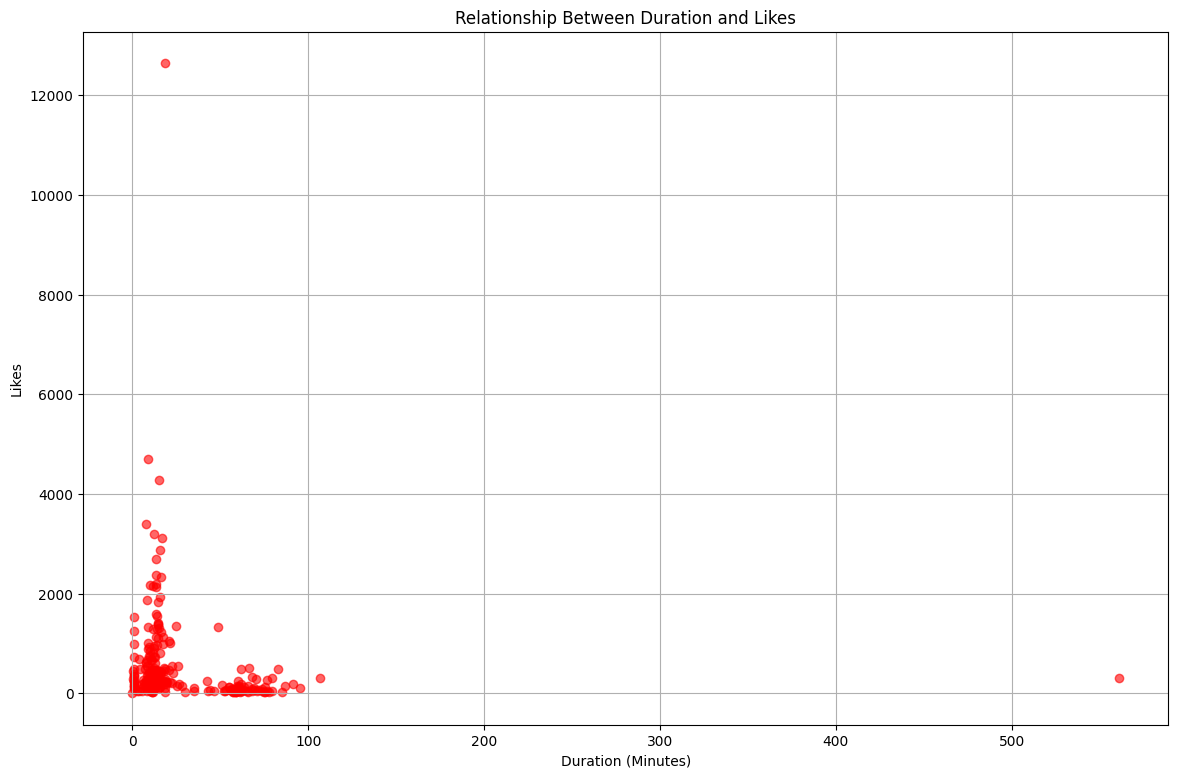

In [34]:

# Plotting the relationship between Duration and Likes
plt.figure(figsize=(14, 9))
plt.scatter(df['Duration (Minutes)'], df['Likes'], color='red', alpha=0.6)
plt.title('Relationship Between Duration and Likes')
plt.xlabel('Duration (Minutes)')
plt.ylabel('Likes')
plt.grid()
plt.show()


we can see that shorter videos have less likes

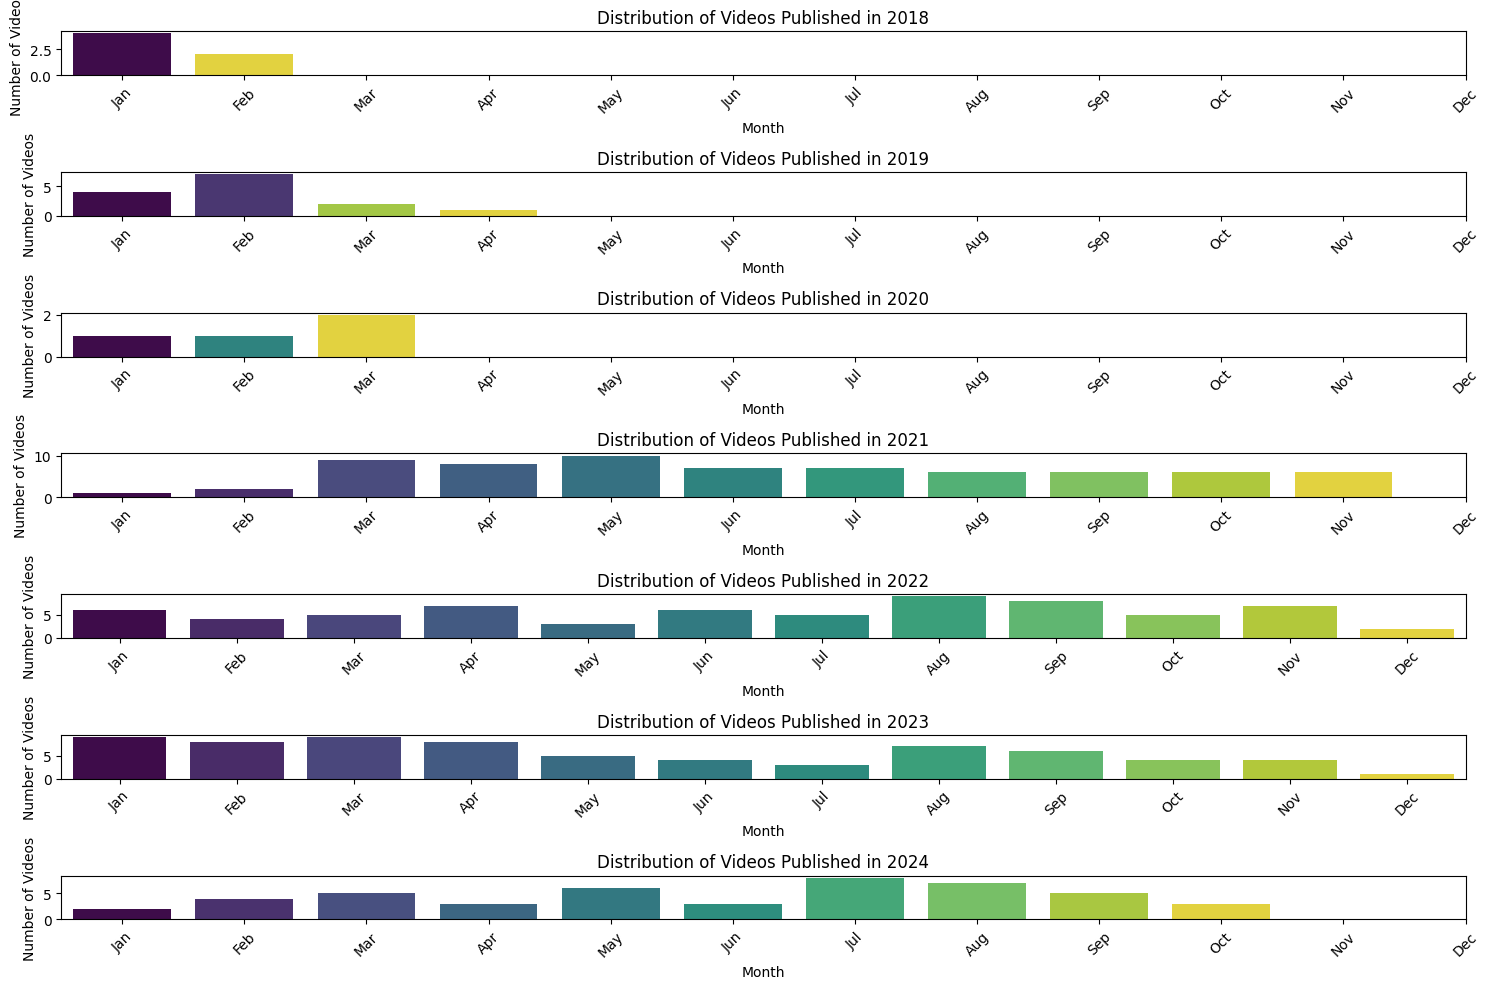

In [51]:

# Total number of videos per month per year


# Extract Year and Month
df['Year'] = df['Published_date'].dt.year
df['Month'] = df['Published_date'].dt.month

# Group by Year and Month, counting the number of videos
monthly_video_count = df.groupby(['Year', 'Month']).size().reset_index(name='Video Count')

# Create a grid of plots for each year
years = monthly_video_count['Year'].unique()
num_years = len(years)

plt.figure(figsize=(15, 10))

for i, year in enumerate(years):
    plt.subplot(num_years, 1, i + 1)
    sns.barplot(data=monthly_video_count[monthly_video_count['Year'] == year],
                x='Month',
                y='Video Count',
                hue='Month',
                palette='viridis',
                legend=False)
    plt.title(f'Distribution of Videos Published in {year}')
    plt.xlabel('Month')
    plt.ylabel('Number of Videos')
    plt.xticks(ticks=range(12), labels=[
        'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
        'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)

plt.tight_layout()
plt.show()

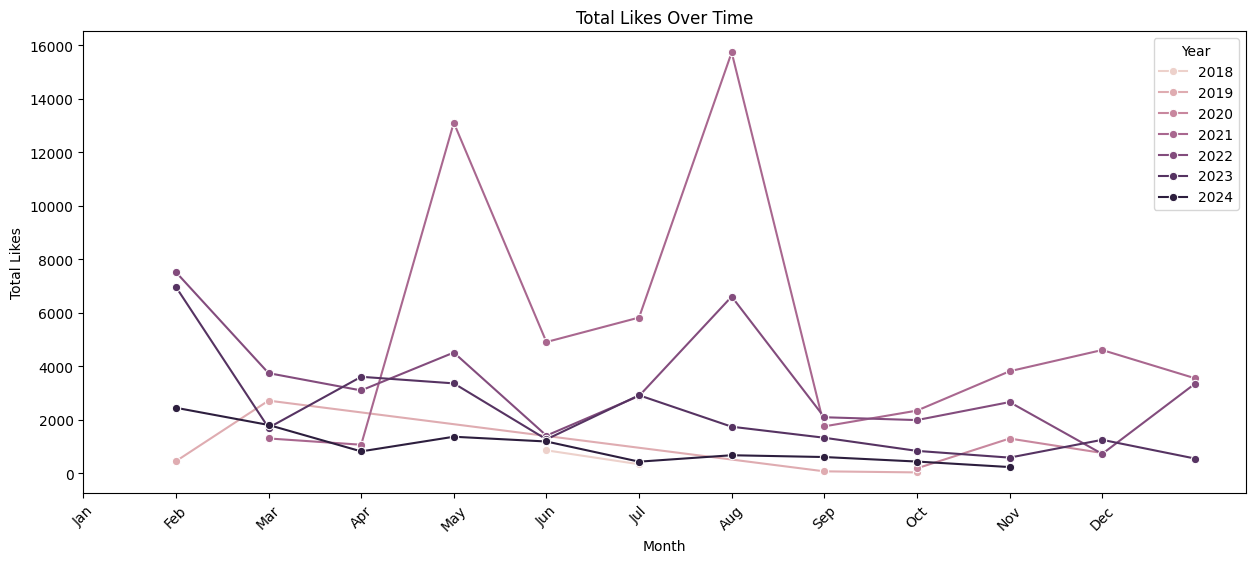

In [36]:

# summary of likes overtime
# Group by Year and Month, summing Likes
monthly_likes = df.groupby(['Year', 'Month'])['Likes'].sum().reset_index()

plt.figure(figsize=(15, 6))
sns.lineplot(data=monthly_likes, x='Month', y='Likes', hue='Year', marker='o')
plt.title('Total Likes Over Time')
plt.xlabel('Month')
plt.ylabel('Total Likes')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.show()


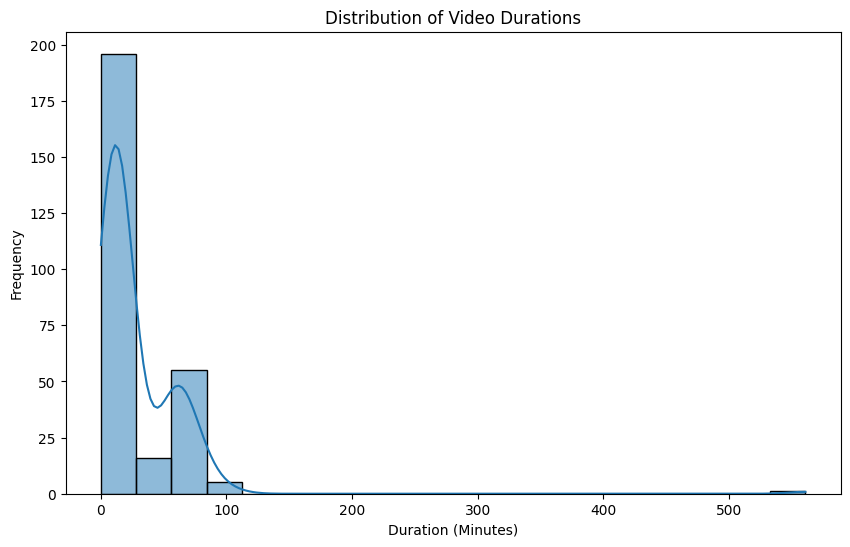

In [37]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Duration (Minutes)'], bins=20, kde=True)
plt.title('Distribution of Video Durations')
plt.xlabel('Duration (Minutes)')
plt.ylabel('Frequency')
plt.show()

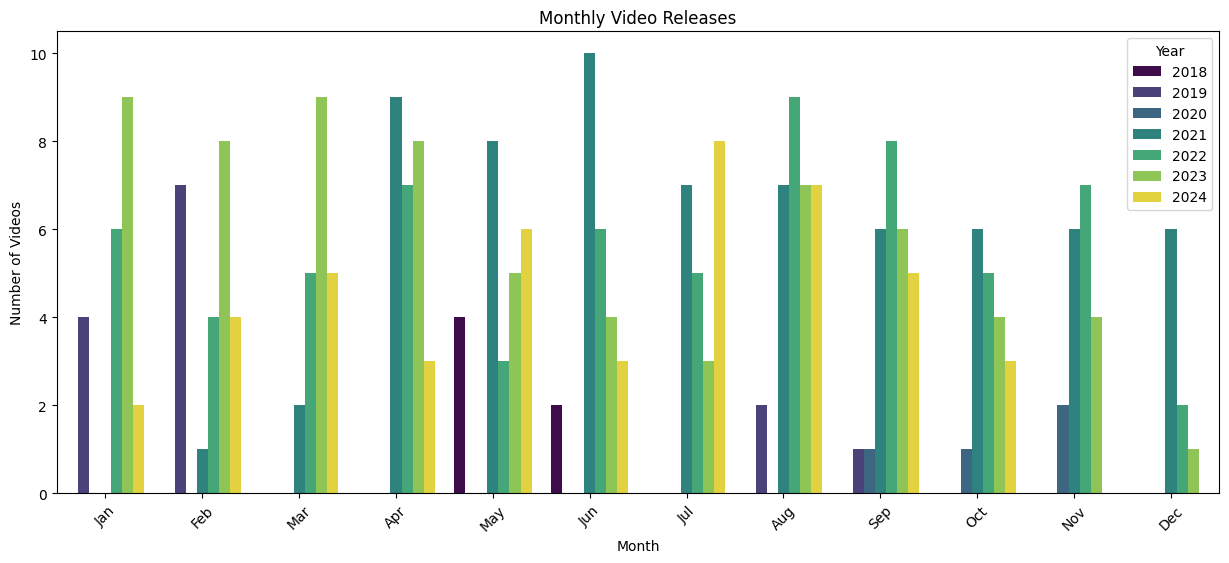

In [ ]:
# In the follwoing we would want to view at the distribution of videos per month
monthly_video_count = df.groupby(['Year', 'Month']).size().reset_index(name='Video Count')

plt.figure(figsize=(15, 6))
sns.barplot(data=monthly_video_count, x='Month', y='Video Count', hue='Year', palette='viridis')
plt.title('Monthly Video Releases')
plt.xlabel('Month')
plt.ylabel('Number of Videos')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.show()


In [43]:


# Set display option to show full column width
pd.set_option('display.max_colwidth', None)

# Top 5 videos by views
top_views = df[['Title', 'Views', 'Duration (Minutes)']].nlargest(5, 'Views')
print("Top 5 Videos by Views:")
print(top_views)

# Bottom 5 videos by views
bottom_views = df[['Title', 'Views', 'Duration (Minutes)']].nsmallest(5, 'Views')
print("\nBottom 5 Videos by views:")
print(bottom_views)


Top 5 Videos by Views:
                                                                                            Title  \
217  Data Engineering Road Map - How To Learn Data Engineering Quickly( By A FAANG Data Engineer)   
149                                                      Intro To Databricks - What Is Databricks   
145                   Snowflake Vs Databricks - 🏃‍♂️ A Race To Build THE Cloud Data Platform 🏃‍♂️   
161                   What Is DBT and Why Is It So Popular -  Intro To Data Infrastructure Part 3   
175                                                 Top Courses To Become A Data Engineer In 2022   

      Views  Duration (Minutes)  
217  331197               18.23  
149  263792               12.47  
145  157174               13.35  
161  150337                9.80  
175  139173               15.18  

Bottom 5 Videos by views:
                                                                     Title  \
241                 Data Analytics Webinar For Small And Medi

In [45]:

# Top 5 videos by likes
top_likes = df[['Title', 'Likes', 'Duration (Minutes)']].nlargest(5, 'Likes')
print("\nTop 5 Videos by Likes:")
print(top_likes)

# bottom 5 videos by likes
bottom_likes = df[['Title', 'Likes', 'Duration (Minutes)']].nsmallest(5, 'Likes')
print("\nTop 5 Videos by Likes:")
print(bottom_likes)


Top 5 Videos by Likes:
                                                                                            Title  \
217  Data Engineering Road Map - How To Learn Data Engineering Quickly( By A FAANG Data Engineer)   
243                                                    What Skills Do Data Engineers Need To Know   
175                                                 Top Courses To Become A Data Engineer In 2022   
245                                                Being A Data Engineer: Expectations vs Reality   
149                                                      Intro To Databricks - What Is Databricks   

     Likes  Duration (Minutes)  
217  12643               18.23  
243   4694                8.70  
175   4284               15.18  
245   3402                7.47  
149   3203               12.47  

Top 5 Videos by Likes:
                                                                            Title  \
241                        Data Analytics Webinar For Small An

In [47]:

# Top 5 videos by comments
top_comments = df[['Title', 'Comments', 'Duration (Minutes)']].nlargest(5, 'Comments')
print("\nTop 5 Videos by comments:")
print(top_comments)

# bottom 5 videos by comments
bottom_comments = df[['Title', 'Comments', 'Duration (Minutes)']].nsmallest(5, 'Comments')
print("\nTop 5 Videos by Comments:")
print(bottom_comments)


Top 5 Videos by comments:
                                                                                              Title  \
217    Data Engineering Road Map - How To Learn Data Engineering Quickly( By A FAANG Data Engineer)   
187  Why You Should Become A Data Engineer And Not A Data Scientist - Picking The Right Data Career   
178                                                      How I Would Become A Data Engineer in 2022   
245                                                  Being A Data Engineer: Expectations vs Reality   
175                                                   Top Courses To Become A Data Engineer In 2022   

     Comments  Duration (Minutes)  
217       360               18.23  
187       269                8.47  
178       181               15.58  
245       174                7.47  
175       159               15.18  

Top 5 Videos by Comments:
                                                                           Title  \
1                  Setting 

In [49]:

# we will be  grouping data and see how shorter videos compare to longer videos

# Define function to categorize videos by duration
def categorize_duration(duration):
    if duration <= 20:
        return '0-20 minutes'
    elif 20 < duration <= 40:
        return '20-40 minutes'
    elif 40 < duration <= 60:
        return '40-60 minutes'
    else:
        return '60+ minutes'

# Create a new column in the DataFrame to categorize by duration
df['Duration Category'] = df['Duration (Minutes)'].apply(categorize_duration)

# Group by the 'Duration Category' and calculate the count of videos and sum of views
grouped = df.groupby('Duration Category').agg(
    number_of_videos=('Title', 'count'),          # Count the number of videos
    total_views=('Views', 'sum'),                  # Sum the views
).reset_index()

# Calculate the average views per video
grouped['average_views'] = grouped['total_views'] / grouped['number_of_videos']

# Print the results
print(grouped)


  Duration Category  number_of_videos  total_views  average_views
0      0-20 minutes               185      4749436   25672.627027
1     20-40 minutes                15       260140   17342.666667
2     40-60 minutes                30       135960    4532.000000
3       60+ minutes                43       193999    4511.604651


In summary, the data shows that shorter videos (0-20 minutes) are much more popular, attracting more views and having a higher average view count per video.

As videos get longer, both the number of videos and views tend to decline, suggesting that viewers prefer quick, easily digestible content. This insight could help content creators focus on making shorter videos to maximize engagement and viewership.